In [170]:
# key-code-wip/optiSched.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Electricity price data

In [ ]:

data = pd.read_csv("/KEX-photoperiod-scheduling/data/Sweden.csv")
data.head
data['Datetime (Local)'] = pd.to_datetime(data['Datetime (Local)'], errors='coerce')

# Convert time column to datetime format
data['Datetime (UTC)'] = pd.to_datetime(data['Datetime (UTC)'],utc=True)

# Add column for CET
data['Datetime (CET)'] = data['Datetime (UTC)'].dt.tz_convert('CET')

timezone = 'CET'

# Set time as index (optional, but useful)
data.set_index('Datetime (CET)', inplace=True)

# Extract the hour from the timestamp
data['hour'] = data.index.hour


hour
0     38.850400
1     36.012835
2     34.644759
3     34.322410
4     35.954628
5     41.974436
6     55.118658
7     71.879409
8     79.899962
9     76.632278
10    72.704682
11    69.022393
12    65.042054
13    61.724184
14    60.554688
15    62.521457
16    66.845323
17    75.605482
18    78.846271
19    75.896884
20    68.023998
21    60.605701
22    52.023839
23    41.460290
Name: Price (EUR/MWhe), dtype: float64
[41.46029025 38.85039978 36.01283525 34.64475904 34.32240964 35.9546276
 41.97443593 55.11865827 71.87940854 79.89996166 76.6322782  72.70468237
 69.02239321 65.04205367 61.72418401 60.55468784 62.52145674 66.84532311
 75.60548193 78.84627054 75.8968839  68.02399781 60.60570099 52.02383899]


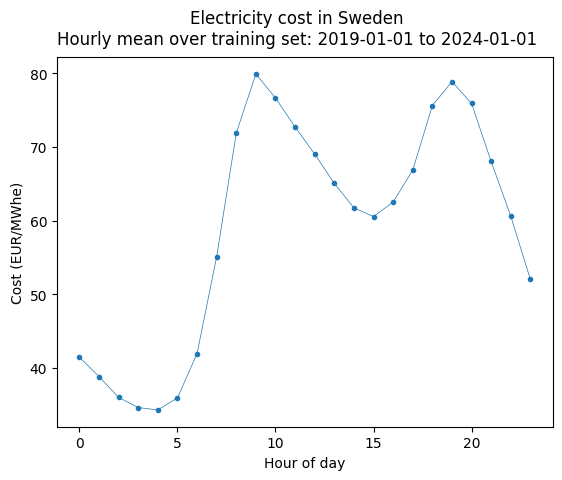

In [ ]:
# Training data set

train_start_date = '2019-01-01 00:00:00'
train_end_date = '2024-01-01 00:00:00'

train_filtered_data = data[(data['Datetime (UTC)'] >= train_start_date) & (data['Datetime (UTC)'] <= train_end_date)]

# Group by hour and sum the price for each hour across all weeks
train_hourly_mean = train_filtered_data.groupby('hour')['Price (EUR/MWhe)'].mean()

# Display the result
print(train_hourly_mean)

train_sorted_hourly_mean = np.zeros(24)
train_sorted_hourly_mean[train_filtered_data['hour'][0:24]] = train_hourly_mean
train_cvec = train_sorted_hourly_mean
print(train_sorted_hourly_mean)

fig, ax = plt.subplots(1,1)
ax.plot(range(24), train_sorted_hourly_mean,'.-',linewidth=0.5) 
fig.suptitle("Electricity cost in Sweden\nHourly mean over training set: 2019-01-01 to 2024-01-01")
ax.set_ylabel("Cost (EUR/MWhe)")
ax.set_xlabel("Hour of day")
plt.savefig("/KEX-photoperiod-scheduling/figures/testTrain/costPlotTrain.png")

hour
0     25.853397
1     24.053134
2     23.016612
3     22.705055
4     23.509563
5     26.962678
6     34.293689
7     45.997514
8     50.679836
9     45.394727
10    40.228251
11    36.193880
12    33.444481
13    31.385710
14    31.847404
15    35.230219
16    41.354153
17    49.294617
18    51.241749
19    49.483361
20    44.520301
21    38.538907
22    33.118825
23    27.517644
Name: Price (EUR/MWhe), dtype: float64
[27.51764384 25.85339726 24.05313351 23.01661202 22.70505464 23.50956284
 26.9626776  34.29368852 45.99751366 50.67983607 45.39472678 40.22825137
 36.19387978 33.44448087 31.38571038 31.84740437 35.23021858 41.35415301
 49.29461749 51.24174863 49.48336066 44.52030055 38.5389071  33.11882514]


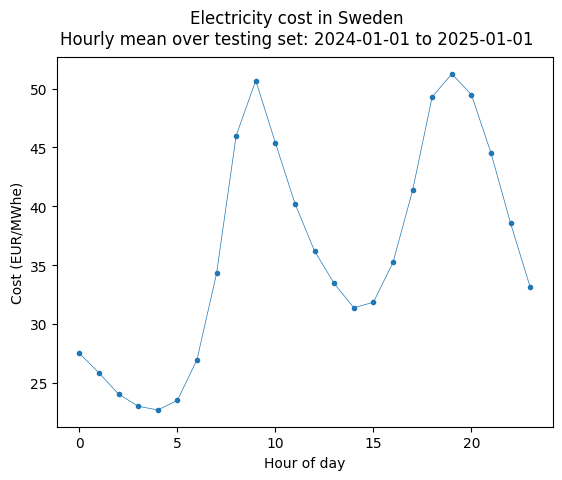

In [ ]:
# Testing data set

test_start_date = '2024-01-01 00:00:00'
test_end_date = '2025-01-01 00:00:00'

test_filtered_data = data[(data['Datetime (UTC)'] >= test_start_date) & (data['Datetime (UTC)'] <= test_end_date)]

# Group by hour and sum the price for each hour across all weeks
test_hourly_mean = test_filtered_data.groupby('hour')['Price (EUR/MWhe)'].mean()

# Display the result
print(test_hourly_mean)

test_sorted_hourly_mean = np.zeros(24)
test_sorted_hourly_mean[test_filtered_data['hour'][0:24]] = test_hourly_mean
test_cvec = test_sorted_hourly_mean
print(test_sorted_hourly_mean)

fig, ax = plt.subplots(1,1)
ax.plot(range(24), test_sorted_hourly_mean,'.-',linewidth=0.5) #fix line, sort values
fig.suptitle("Electricity cost in Sweden\nHourly mean over testing set: 2024-01-01 to 2025-01-01")
ax.set_ylabel("Cost (EUR/MWhe)")
ax.set_xlabel("Hour of day")
plt.savefig("/KEX-photoperiod-scheduling/figures/testTrain/costPlotTest.png")

# Farm energy data

In [ ]:
data_power = pd.read_csv("/KEX-photoperiod-scheduling/data/power_day.csv",skiprows=[0])
data_power['Datetime (Local)'] = pd.to_datetime(data_power['Datetime (Local)'])
data_power['Datetime (Local)'] = data_power['Datetime (Local)'].dt.tz_localize(tz='CET')

data_energy = pd.read_csv("/KEX-photoperiod-scheduling/data/energy_usage_day.csv",skiprows=[0])
data_energy['Datetime (Local)'] = pd.to_datetime(data_energy['Datetime (Local)'])
data_energy['Datetime (Local)'] = data_energy['Datetime (Local)'].dt.tz_localize(tz='CET')

In [175]:
power_mean = data_power['Power(W)'].groupby(data_power['Power(W)'].ge(50)).mean()
power_dark_hour_mean = power_mean[0]
power_light_hour_mean = power_mean[1]

energy_mean = data_energy['Energy Usage(kWh)'].groupby(data_energy['Energy Usage(kWh)'].ge(0.02)).mean()
energy_dark_hour_mean = energy_mean[0]
energy_light_hour_mean = energy_mean[1]

# Set time as index (optional, but useful)
data_energy.set_index('Datetime (Local)', inplace=True)

# Extract the hour from the timestamp
data_energy['hour'] = data_energy.index.hour

print(power_dark_hour_mean)
print(power_light_hour_mean)
print(energy_dark_hour_mean)
print(energy_light_hour_mean)

# Setting dark hour energy use as baseline to find energy use of lights
power_mean_lights = power_light_hour_mean - power_dark_hour_mean
energy_mean_lights = energy_light_hour_mean - energy_dark_hour_mean
energy_mean_lights_MWh = energy_mean_lights/1000
energy_mean_lights_MWh_yearly = 365*energy_mean_lights_MWh

14.90625
182.94300518134716
0.015351851851851851
0.18199056603773586


/var/folders/h8/4x9ydqms6k59rk527wyg0ctm0000gn/T/ipykernel_73454/2848879664.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  power_dark_hour_mean = power_mean[0]
/var/folders/h8/4x9ydqms6k59rk527wyg0ctm0000gn/T/ipykernel_73454/2848879664.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  power_light_hour_mean = power_mean[1]
/var/folders/h8/4x9ydqms6k59rk527wyg0ctm0000gn/T/ipykernel_73454/2848879664.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

# Schedule optimization

In [ ]:
# Illustrate schedule graphically
def sched_fig(solution,intermittent,name,timezone,cost_sample_farm):
    vis_photo = np.array([solution])
    x_tick = range(0,25)-np.ones(25)*0.5
    if intermittent==True:
        vis_photo = np.zeros((6,24*6))
        for i in range(0,24):
            if solution[i]==1:
                vis_photo[:,i*6:i*6+6]=1
            else:
                vis_photo[:,i*6]=1
                vis_photo[:,i*6+1:1*6+6]=0
        x_tick = range(0,24*6+1,6)-np.ones(25)*0.5

    plt.figure()
    plt.matshow(vis_photo)
    plt.tick_params(axis='x', left=True)
    plt.xticks(ticks=x_tick,labels=range(0,25))
    plt.yticks(ticks=[])
    plt.grid(axis='x',color='k',which='major')
    plt.title(name+' ('+timezone+')\nCost test set = '+str(round(cost_sample_farm,2))+' EUR/year')
    #plt.xlabel("Data size = "+cost_data_length)

    plt.savefig("/KEX-photoperiod-scheduling/figures/testTrain/"+name+'.png')
    #\nCost='+str(round(cost,2))+'EUR/smmmth'

## Control

[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
647.5525683060108
39.386174482852375


<Figure size 640x480 with 0 Axes>

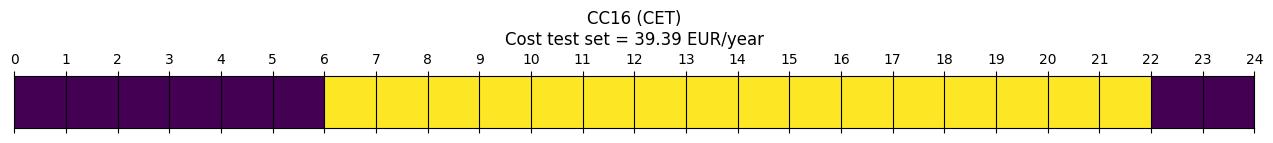

In [177]:
# Single case - CC16
name = 'CC16'
intermittent = False

template_schedule_CC16 = np.zeros(24)
template_schedule_CC16[data_energy['hour'][0:24]] = data_energy['Energy Usage(kWh)'].ge(0.02)[0:24]
cost = sum(np.multiply(template_schedule_CC16,test_cvec))
cost_sample_farm = cost*energy_mean_lights_MWh_yearly

print(template_schedule_CC16)
print(cost)
print(cost_sample_farm)

test_best_cost_CC16 = cost_sample_farm
train_best_cost_CC16 = sum(np.multiply(template_schedule_CC16,train_cvec))*energy_mean_lights_MWh_yearly

sched_fig(template_schedule_CC16,intermittent,name,timezone,test_best_cost_CC16)

## Exhaustive method

In [178]:
def exhaustive_method(template_schedule,intermittent):
    best_schedule = np.zeros(24)
    best_cost = 100000

    for i in range(24):
        new_schedule = np.zeros(24)
        new_cost = 0
        for j in range(24):
            new_schedule[(i+j)%24] = template_schedule[j]
            new_cost += template_schedule[j]*train_cvec[(i+j)%24] + int(intermittent)*(1-template_schedule[j])*(1/6)*train_cvec[(i+j)%24]
        if new_cost<best_cost:
            best_cost = new_cost
            best_schedule = new_schedule

    return best_schedule, best_cost

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
858.7073697506851
52.229270564376776


<Figure size 640x480 with 0 Axes>

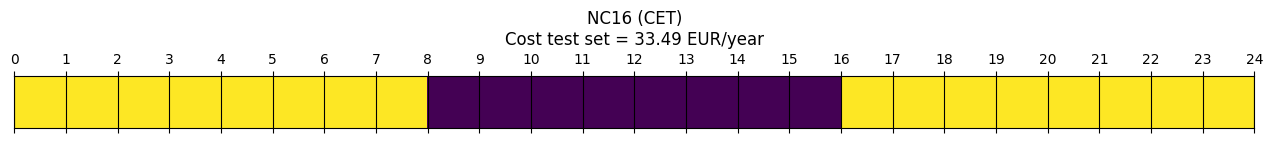

In [179]:
# Exhaustive method - NC16
name = 'NC16'
intermittent = False

template_schedule = np.zeros(24)
template_schedule[data_energy['hour'][0:24]] = data_energy['Energy Usage(kWh)'].ge(0.02)[0:24]

solution, cost = exhaustive_method(template_schedule,intermittent)
print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_best_cost_NC16 = cost_sample_farm
test_best_cost_NC16 = sum(np.multiply(solution,test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,intermittent,name,timezone,test_best_cost_NC16)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
711.7539716126782
43.29110482587501


<Figure size 640x480 with 0 Axes>

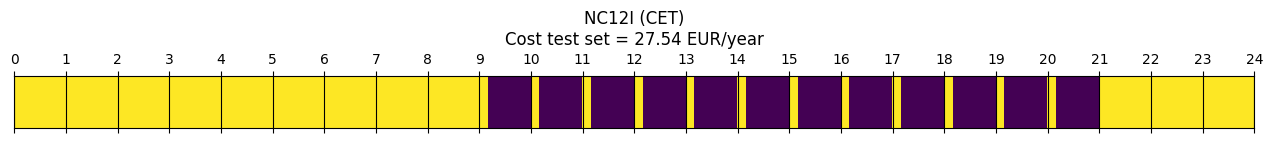

In [180]:
# Exhaustive method - NC12I
name = 'NC12I'
intermittent = True

template_schedule = np.zeros(24)
template_schedule[0:12] = np.ones(12)

solution, cost = exhaustive_method(template_schedule,intermittent)
print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_best_cost_NC12I = cost_sample_farm
test_best_cost_NC12I = sum(np.multiply(solution+(np.ones(24)-solution)*(1/6),test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,intermittent,name,timezone,test_best_cost_NC12I)

[1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
800.0972870723575
48.6644218465934


<Figure size 640x480 with 0 Axes>

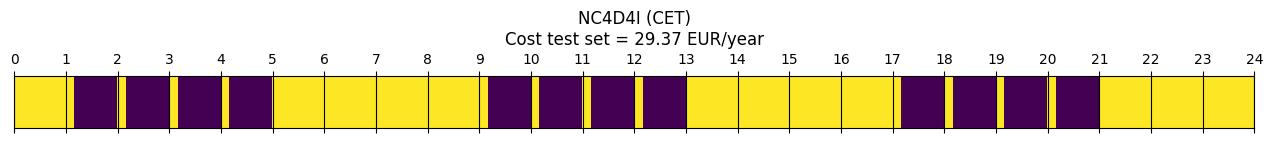

In [181]:
# Exhaustive method - NC4D4I
name = 'NC4D4I'
intermittent = True

template_schedule = np.concatenate((np.zeros(4), np.ones(4), np.zeros(4), np.ones(4), np.zeros(4), np.ones(4)))

solution, cost = exhaustive_method(template_schedule,intermittent)
print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_best_cost_NC4D4I = cost_sample_farm
test_best_cost_NC4D4I = sum(np.multiply(solution+(np.ones(24)-solution)*(1/6),test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,intermittent,name,timezone,test_best_cost_NC4D4I)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
702.9309385714225
42.754460334231744


<Figure size 640x480 with 0 Axes>

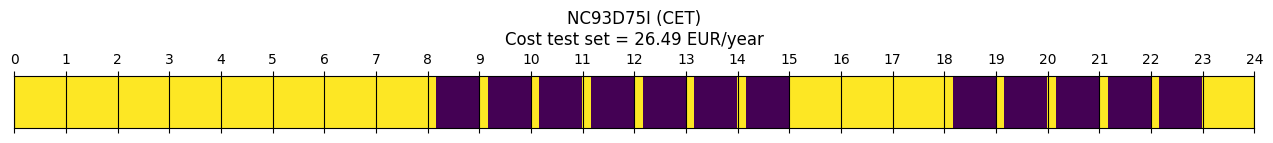

In [182]:
# Exhaustive method - NC93D75I
name = 'NC93D75I'

intermittent = True

template_schedule = np.concatenate((np.ones(9), np.zeros(7), np.ones(3), np.zeros(5)))

solution, cost = exhaustive_method(template_schedule,intermittent)
print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_best_cost_NC93D75I = cost_sample_farm
test_best_cost_NC93D75I = sum(np.multiply(solution+(np.ones(24)-solution)*(1/6),test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,intermittent,name,timezone,test_best_cost_NC93D75I)

## Dynamic programming

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]
697.066859527976
42.39778868826697


<Figure size 640x480 with 0 Axes>

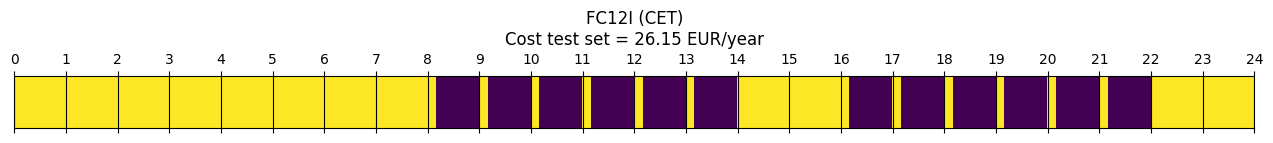

In [183]:
# Dynamic programming - FC12I

# Stages k: each hour 0,...,23
# States s_k: light hours left (and how long since last dark?)
# Decisions x_k: light (1) or not (0) next hour
# Value funktion v_k(s_k) = min(cost(s_k,...,s_23))
# State update equation s_k+1 = h(s_k,x_k) = s_k - x_k
#
# Base case: v_24(s) = 0
# Recursive case: v_k(s) = 
#                           min_(x_k)(v_k+1(s_k-x_k)) if s_k>0 
#                           0 else
#
# cvec - vector with cost per hour
# 
name = 'FC12I'

total_light_hours = 14
light_hours = 12
intermittent_lengt = 10
min_v = np.zeros((light_hours+1,24))
minimizers_x = np.zeros((light_hours+1,24))
#cvec = hourly_mean

def dynProg(s_k,k):
    if k==24 and s_k==0:
        return 0 
    elif k==24:
        return 100000
    elif min_v[s_k,k]>0:
        return min_v[s_k,k]
    else:
        v_k_0 = dynProg(s_k,k+1) + train_cvec[k]*(1/6)
        v_k_1 = dynProg(s_k-1,k+1) + train_cvec[k]
        if v_k_0 < v_k_1:
            minimizers_x[s_k,k] = 0
            min_v[s_k,k] = v_k_0
        else:
            minimizers_x[s_k,k] = 1
            min_v[s_k,k] = v_k_1
        return min_v[s_k,k]
    

cost = dynProg(light_hours,0)

solution = np.zeros(24)
solution_v = np.zeros(24)
row = light_hours
column = 0
for i in range(24):
    solution[i] = minimizers_x[row,column]
    solution_v[i] = min_v[row,column]
    if solution[i] == 1:
        row -= 1
    column += 1

print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_best_cost_FC12I = cost_sample_farm
test_best_cost_FC12I = sum(np.multiply(solution+(np.ones(24)-solution)*(1/6),test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,True,name,timezone,test_best_cost_FC12I)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
815.6796589073116
49.612190484981625


<Figure size 640x480 with 0 Axes>

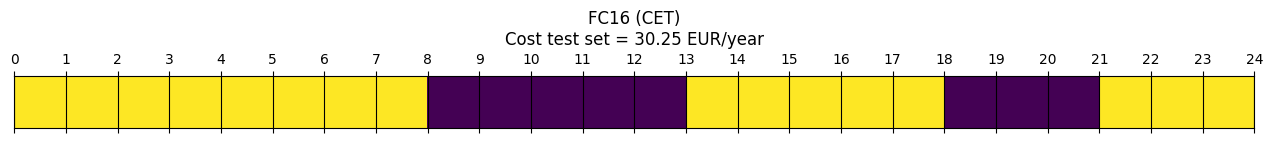

In [184]:
# Dynamic programming - FC16

# Stages k: each hour 0,...,23
# States s_k: light hours left (and how long since last dark?)
# Decisions x_k: light (1) or not (0) next hour
# Value funktion v_k(s_k) = min(cost(s_k,...,s_23))
# State update equation s_k+1 = h(s_k,x_k) = s_k - x_k
#
# Base case: v_24(s) = 0
# Recursive case: v_k(s) = 
#                           min_(x_k)(v_k+1(s_k-x_k)) if s_k>0 
#                           0 else
#
# cvec - vector with cost per hour
# 

name = 'FC16'

total_light_hours = 16
min_v = np.zeros((total_light_hours+1,24))
minimizers_x = np.zeros((total_light_hours+1,24))

def dynProg(s_k,k):
    if k==24 and s_k==0:
        return 0 
    elif k==24:
        return 100000
    elif s_k==0:
        return 0
    elif min_v[s_k,k]>0:
        return min_v[s_k,k]
    else:
        v_k_0 = dynProg(s_k,k+1)
        v_k_1 = dynProg(s_k-1,k+1) + train_cvec[k]
        if v_k_0 < v_k_1:
            minimizers_x[s_k,k] = 0
            min_v[s_k,k] = v_k_0
        else:
            minimizers_x[s_k,k] = 1
            min_v[s_k,k] = v_k_1
        return min_v[s_k,k]
    
cost=dynProg(total_light_hours,0)

# Go through matrix to find solution
# - If 1, go up and right
# - If 0, go right
solution = np.zeros(24)
solution_v = np.zeros(24)
row = total_light_hours
column = 0
for i in range(24):
    solution[i] = minimizers_x[row,column]
    solution_v[i] = min_v[row,column]
    if solution[i] == 1:
        row -= 1
    column += 1

print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_best_cost_FC16 = cost_sample_farm
test_best_cost_FC16 = sum(np.multiply(solution,test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,False,name,timezone,test_best_cost_FC16)


# Schedule worst case

## Exhaustive method 2

In [185]:
def exhaustive_method_worst(template_schedule,intermittent):
    best_schedule = np.zeros(24)
    best_cost = 0

    for i in range(24):
        new_schedule = np.zeros(24)
        new_cost = 0
        for j in range(24):
            new_schedule[(i+j)%24] = template_schedule[j]
            new_cost += template_schedule[j]*train_cvec[(i+j)%24] + int(intermittent)*(1-template_schedule[j])*(1/6)*train_cvec[(i+j)%24]
        if new_cost>best_cost:
            best_cost = new_cost
            best_schedule = new_schedule

    return best_schedule, best_cost

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1100.9234227820373
66.9616092101752


<Figure size 640x480 with 0 Axes>

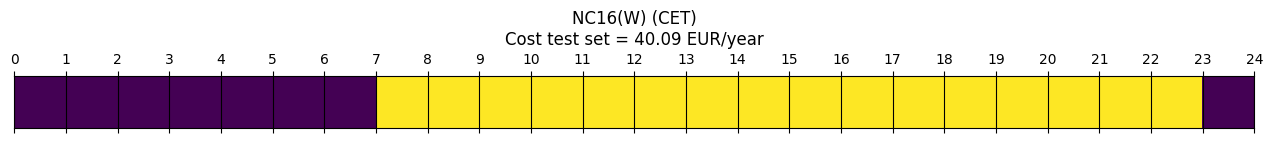

In [186]:
# Exhaustive method - NC16(W)
name = 'NC16(W)'
intermittent = False

template_schedule_AC16 = np.zeros(24)
template_schedule_AC16[data_energy['hour'][0:24]] = data_energy['Energy Usage(kWh)'].ge(0.02)[0:24]

solution, cost = exhaustive_method_worst(template_schedule_AC16,False)
print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_worst_cost_NC16 = cost_sample_farm
test_worst_cost_NC16 = sum(np.multiply(solution,test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,intermittent,name,timezone,test_worst_cost_NC16)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
940.4408841880937
57.20055879376303


<Figure size 640x480 with 0 Axes>

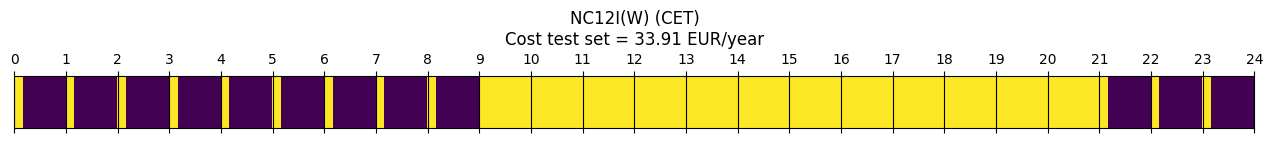

In [187]:
# Exhaustive method - NC12I(W)
name = 'NC12I(W)'
intermittent = True

template_schedule = np.zeros(24)
template_schedule[0:12] = np.ones(12)

solution, cost = exhaustive_method_worst(template_schedule,intermittent)
print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_worst_cost_NC12I = cost_sample_farm
test_worst_cost_NC12I = sum(np.multiply(solution+(np.ones(24)-solution)*(1/6),test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,intermittent,name,timezone,test_worst_cost_NC12I)

[0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
852.0975687284142
51.827241773044626


<Figure size 640x480 with 0 Axes>

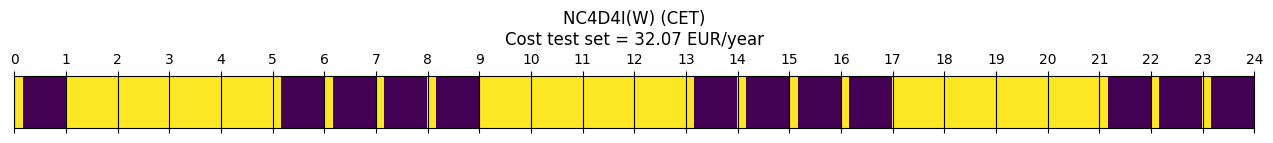

In [188]:
# Exhaustive method - NC4D4I(W)
name = 'NC4D4I(W)'
intermittent = True

template_schedule = np.concatenate((np.zeros(4), np.ones(4), np.zeros(4), np.ones(4), np.zeros(4), np.ones(4)))

solution, cost = exhaustive_method_worst(template_schedule,intermittent)
print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_worst_cost_NC4D4I = cost_sample_farm
test_worst_cost_NC4D4I = sum(np.multiply(solution+(np.ones(24)-solution)*(1/6),test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,intermittent,name,timezone,test_worst_cost_NC4D4I)

[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
911.2285804275967
55.423775024737346


<Figure size 640x480 with 0 Axes>

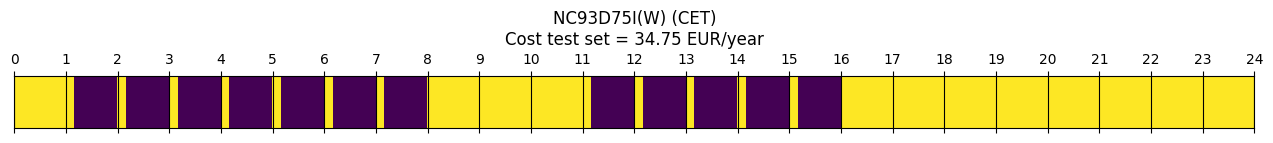

In [189]:
# Exhaustive method - NC93D75I(W)
name = 'NC93D75I(W)'

intermittent = True

template_schedule = np.concatenate((np.ones(9), np.zeros(7), np.ones(3), np.zeros(5)))

solution, cost = exhaustive_method_worst(template_schedule,intermittent)
print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_worst_cost_NC93D75I = cost_sample_farm
test_worst_cost_NC93D75I = sum(np.multiply(solution+(np.ones(24)-solution)*(1/6),test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,intermittent,name,timezone,test_worst_cost_NC93D75I)

## Dynamic programming 2

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
955.1279962727959
58.09387493137107


<Figure size 640x480 with 0 Axes>

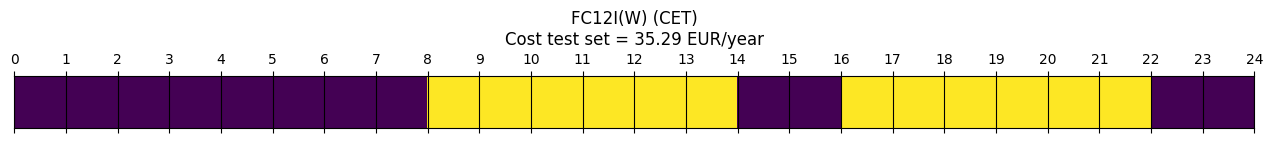

In [190]:
# Dynamic programming - FC12I(W)

# Stages k: each hour 0,...,23
# States s_k: light hours left (and how long since last dark?)
# Decisions x_k: light (1) or not (0) next hour
# Value funktion v_k(s_k) = min(cost(s_k,...,s_23))
# State update equation s_k+1 = h(s_k,x_k) = s_k - x_k
#
# Base case: v_24(s) = 0
# Recursive case: v_k(s) = 
#                           min_(x_k)(v_k+1(s_k-x_k)) if s_k>0 
#                           0 else
#
# cvec - vector with cost per hour
# 
name = 'FC12I(W)'

total_light_hours = 14
light_hours = 12
intermittent_lengt = 10
max_v = np.zeros((light_hours+1,24))
maximizers_x = np.zeros((light_hours+1,24))

def dynProg(s_k,k):
    if k==24 and s_k==0:
        return 0 
    elif k==24:
        return -100000
    elif max_v[s_k,k]>0:
        return max_v[s_k,k]
    else:
        v_k_0 = dynProg(s_k,k+1) + train_cvec[k]*(1/6)
        v_k_1 = dynProg(s_k-1,k+1) + train_cvec[k]
        if v_k_0 > v_k_1:
            maximizers_x[s_k,k] = 0
            max_v[s_k,k] = v_k_0
        else:
            maximizers_x[s_k,k] = 1
            max_v[s_k,k] = v_k_1
        return max_v[s_k,k]
    

cost = dynProg(light_hours,0)

solution = np.zeros(24)
solution_v = np.zeros(24)
row = light_hours
column = 0
for i in range(24):
    solution[i] = maximizers_x[row,column]
    solution_v[i] = max_v[row,column]
    if solution[i] == 1:
        row -= 1
    column += 1

print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_worst_cost_FC12I = cost_sample_farm
test_worst_cost_FC12I = sum(np.multiply(solution+(np.ones(24)-solution)*(1/6),test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,False,name,timezone,test_worst_cost_FC12I)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1100.923422782037
66.96160921017518


<Figure size 640x480 with 0 Axes>

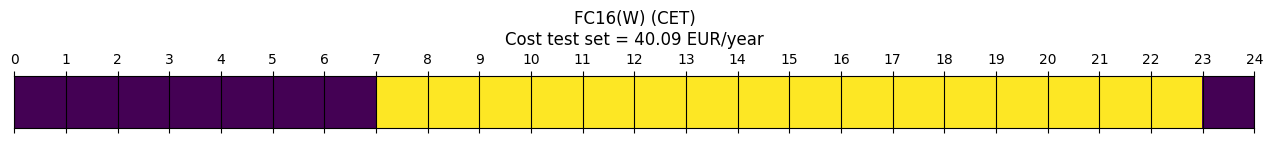

In [191]:
# Dynamic programming - FC16(W)

# Stages k: each hour 0,...,23
# States s_k: light hours left (and how long since last dark?)
# Decisions x_k: light (1) or not (0) next hour
# Value funktion v_k(s_k) = min(cost(s_k,...,s_23))
# State update equation s_k+1 = h(s_k,x_k) = s_k - x_k
#
# Base case: v_24(s) = 0
# Recursive case: v_k(s) = 
#                           min_(x_k)(v_k+1(s_k-x_k)) if s_k>0 
#                           0 else
#
# cvec - vector with cost per hour
# 

name = 'FC16(W)'

total_light_hours = 16
max_v = np.zeros((total_light_hours+1,24))
maximizers_x = np.zeros((total_light_hours+1,24))

def dynProg(s_k,k):
    if k==24 and s_k==0:
        return 0 
    elif k==24:
        return -100000
    elif s_k==0:
        return 0
    elif max_v[s_k,k]>0:
        return max_v[s_k,k]
    else:
        v_k_0 = dynProg(s_k,k+1)
        v_k_1 = dynProg(s_k-1,k+1) + train_cvec[k]
        if v_k_0 > v_k_1:
            maximizers_x[s_k,k] = 0
            max_v[s_k,k] = v_k_0
        else:
            maximizers_x[s_k,k] = 1
            max_v[s_k,k] = v_k_1
        return max_v[s_k,k]
    
cost=dynProg(total_light_hours,0)

# Go through matrix to find solution
# - If 1, go up and right
# - If 0, go right
solution = np.zeros(24)
solution_v = np.zeros(24)
row = total_light_hours
column = 0
for i in range(24):
    solution[i] = maximizers_x[row,column]
    solution_v[i] = max_v[row,column]
    if solution[i] == 1:
        row -= 1
    column += 1

print(solution)
print(cost)

cost_sample_farm = cost*energy_mean_lights_MWh_yearly
print(cost_sample_farm)

train_worst_cost_FC16 = cost_sample_farm
test_worst_cost_FC16 = sum(np.multiply(solution,test_cvec))*energy_mean_lights_MWh_yearly

sched_fig(solution,False,name,timezone,test_worst_cost_FC16)

## Table

In [192]:
# name & test_best_cost_name & test_worst_cost_name & 
# (test_worst_cost_name - test_best_cost_name)/test_worst_cost_name & 
# (test_cost_control - test_best_cost_name)/test_cost_control & 
# train_best_cost_name & train_worst_cost_name

print("CC16 & " + str(np.round(test_best_cost_CC16,3)) + " & & & & \\\\") 
print(" & " + str(np.round(train_best_cost_CC16,3)) + " & & & & \\\\ \\hline" )

print(
"NC16 & " + str(np.round(test_best_cost_NC16,3)) + " & " + str(np.round(test_worst_cost_NC16,3)) + " & " + 
str(np.round((test_worst_cost_NC16 - test_best_cost_NC16)/test_worst_cost_NC16,3)) + " & " +
str(np.round((test_best_cost_CC16 - test_best_cost_NC16)/test_best_cost_CC16,3)) +
" & " + str(np.round((test_best_cost_CC16 - test_worst_cost_NC16)/test_best_cost_CC16,3)) + "\\\\")
print(" & " + str(np.round(train_best_cost_NC16,3)) + " & " + str(np.round(train_worst_cost_NC16,3)) + " & " + 
str(np.round((train_worst_cost_NC16 - train_best_cost_NC16)/train_worst_cost_NC16,3)) + " & " +
str(np.round((train_best_cost_CC16 - train_best_cost_NC16)/train_best_cost_CC16,3)) +
" & " + str(np.round((train_best_cost_CC16 - train_worst_cost_NC16)/train_best_cost_CC16,3)) + "\\\\ \\hline"
)

print(
"NC12I & " + str(np.round(test_best_cost_NC12I,3)) + " & " + str(np.round(test_worst_cost_NC12I,3)) + " & " + 
str(np.round((test_worst_cost_NC12I - test_best_cost_NC12I)/test_worst_cost_NC12I,3)) + " & " +
str(np.round((test_best_cost_CC16 - test_best_cost_NC12I)/test_best_cost_CC16,3)) +
" & " + str(np.round((test_best_cost_CC16 - test_worst_cost_NC12I)/test_best_cost_CC16,3)) + "\\\\")
print(" & " + str(np.round(train_best_cost_NC12I,3)) + " & " + str(np.round(train_worst_cost_NC12I,3)) + " & " + 
str(np.round((train_worst_cost_NC12I - train_best_cost_NC12I)/train_worst_cost_NC12I,3)) + " & " +
str(np.round((train_best_cost_CC16 - train_best_cost_NC12I)/train_best_cost_CC16,3)) + 
" & " + str(np.round((train_best_cost_CC16 - train_worst_cost_NC12I)/train_best_cost_CC16,3)) + "\\\\ \\hline"
)

print(
"NC4D4I & " + str(np.round(test_best_cost_NC4D4I,3)) + " & " + str(np.round(test_worst_cost_NC4D4I,3)) + " & " + 
str(np.round((test_worst_cost_NC4D4I - test_best_cost_NC4D4I)/test_worst_cost_NC4D4I,3)) + " & " +
str(np.round((test_best_cost_CC16 - test_best_cost_NC4D4I)/test_best_cost_CC16,3)) + 
" & " + str(np.round((test_best_cost_CC16 - test_worst_cost_NC4D4I)/test_best_cost_CC16,3)) + "\\\\")
print(" & " + str(np.round(train_best_cost_NC4D4I,3)) + " & " + str(np.round(train_worst_cost_NC4D4I,3)) + " & " + 
str(np.round((train_worst_cost_NC4D4I - train_best_cost_NC4D4I)/train_worst_cost_NC4D4I,3)) + " & " +
str(np.round((train_best_cost_CC16 - train_best_cost_NC4D4I)/train_best_cost_CC16,3)) + 
" & " + str(np.round((train_best_cost_CC16 - train_worst_cost_NC4D4I)/train_best_cost_CC16,3)) + "\\\\ \\hline"
)

print(
"NC93D75I & " + str(np.round(test_best_cost_NC93D75I,3)) + " & " + str(np.round(test_worst_cost_NC93D75I,3)) + " & " + 
str(np.round((test_worst_cost_NC93D75I - test_best_cost_NC93D75I)/test_worst_cost_NC93D75I,3)) + " & " +
str(np.round((test_best_cost_CC16 - test_best_cost_NC93D75I)/test_best_cost_CC16,3)) + 
" & " + str(np.round((test_best_cost_CC16 - test_worst_cost_NC93D75I)/test_best_cost_CC16,3)) +"\\\\")
print(" & " + str(np.round(train_best_cost_NC93D75I,3)) + " & " + str(np.round(train_worst_cost_NC93D75I,3)) + " & " + 
str(np.round((train_worst_cost_NC93D75I - train_best_cost_NC93D75I)/train_worst_cost_NC93D75I,3)) + " & " +
str(np.round((train_best_cost_CC16 - train_best_cost_NC93D75I)/train_best_cost_CC16,3)) +
" & " + str(np.round((train_best_cost_CC16 - train_worst_cost_NC93D75I)/train_best_cost_CC16,3)) + "\\\\ \\hline"
)

print(
"FC12I & " + str(np.round(test_best_cost_FC12I,3)) + " & " + str(np.round(test_worst_cost_FC12I,3)) + " & " + 
str(np.round((test_worst_cost_FC12I - test_best_cost_FC12I)/test_worst_cost_FC12I,3)) + " & " +
str(np.round((test_best_cost_CC16 - test_best_cost_FC12I)/test_best_cost_CC16,3)) +
" & " + str(np.round((test_best_cost_CC16 - test_worst_cost_FC12I)/test_best_cost_CC16,3)) + "\\\\")
print(" & " + str(np.round(train_best_cost_FC12I,3)) + " & " + str(np.round(train_worst_cost_FC12I,3)) + " & " + 
str(np.round((train_worst_cost_FC12I - train_best_cost_FC12I)/train_worst_cost_FC12I,3)) + " & " +
str(np.round((train_best_cost_CC16 - train_best_cost_FC12I)/train_best_cost_CC16,3)) +
" & " + str(np.round((train_best_cost_CC16 - train_worst_cost_FC12I)/train_best_cost_CC16,3)) + "\\\\ \\hline"
)

print(
"FC16 & " + str(np.round(test_best_cost_FC16,3)) + " & " + str(np.round(test_worst_cost_FC16,3)) + " & " + 
str(np.round((test_worst_cost_FC16 - test_best_cost_FC16)/test_worst_cost_FC16,3)) + " & " +
str(np.round((test_best_cost_CC16 - test_best_cost_FC16)/test_best_cost_CC16,3)) +
" & " + str(np.round((test_best_cost_CC16 - test_worst_cost_FC16)/test_best_cost_CC16,3)) + "\\\\")
print(" & " + str(np.round(train_best_cost_FC16,3)) + " & " + str(np.round(train_worst_cost_FC16,3)) + " & " + 
str(np.round((train_worst_cost_FC16 - train_best_cost_FC16)/train_worst_cost_FC16,3)) + " & " +
str(np.round((train_best_cost_CC16 - train_best_cost_FC16)/train_best_cost_CC16,3)) +
" & " + str(np.round((train_best_cost_CC16 - train_worst_cost_FC16)/train_best_cost_CC16,3)) + "\\\\ \\hline"
)


CC16 & 39.386 & & & & \\
 & 65.828 & & & & \\ \hline
NC16 & 33.495 & 40.09 & 0.165 & 0.15 & -0.018\\
 & 52.229 & 66.962 & 0.22 & 0.207 & -0.017\\ \hline
NC12I & 27.536 & 33.906 & 0.188 & 0.301 & 0.139\\
 & 43.291 & 57.201 & 0.243 & 0.342 & 0.131\\ \hline
NC4D4I & 29.375 & 32.068 & 0.084 & 0.254 & 0.186\\
 & 48.664 & 51.827 & 0.061 & 0.261 & 0.213\\ \hline
NC93D75I & 26.49 & 34.747 & 0.238 & 0.327 & 0.118\\
 & 42.754 & 55.424 & 0.229 & 0.351 & 0.158\\ \hline
FC12I & 26.153 & 35.289 & 0.259 & 0.336 & 0.104\\
 & 42.398 & 58.094 & 0.27 & 0.356 & 0.117\\ \hline
FC16 & 30.25 & 40.09 & 0.245 & 0.232 & -0.018\\
 & 49.612 & 66.962 & 0.259 & 0.246 & -0.017\\ \hline
